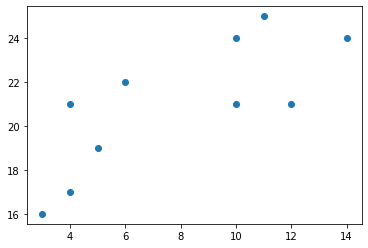

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

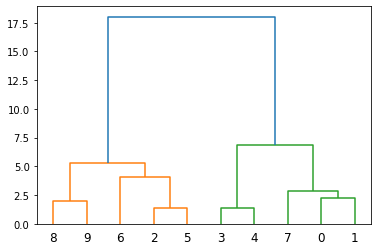

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

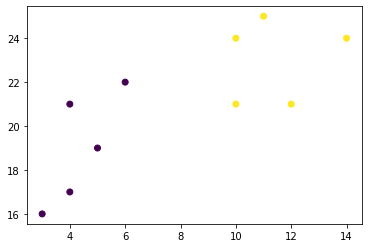

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

# Import Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

%matplotlib inline

# Import Dataset

In [5]:
df = pd.read_csv('../Dataset/songs_normalize_preprocessed.csv')
df

,Unnamed: 0,popularity,key,year,mode,liveness,tempo,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,duration_ms,valence,genre
0,0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272,pop
1,1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118,"rock, pop"
2,2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441,"pop, country"
3,3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615,"rock, metal"
4,4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1722,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727,pop
1723,1723,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122,pop
1724,1724,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704,"hip hop, country"
1725,1725,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946,pop


# Feature Selection

In [6]:
df.drop(columns=['Unnamed: 0', 'genre', 'popularity', 'mode', 'tempo', 'duration_ms', 'key', 'year'], inplace=True)

# Showing the dendogram of linkaged data

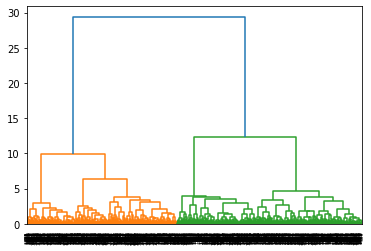

In [7]:
linkage_data = linkage(df, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

0
1
2
3


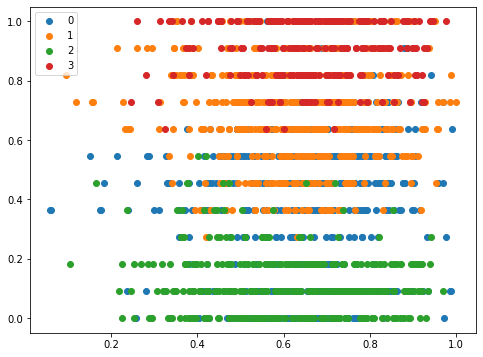

In [50]:
data = df.values
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
label = labels.astype('int32')

fig, ax = plt.subplots(figsize=(8, 6))

u_labels = np.unique(label)

for i in u_labels:
    print(i)
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()

# PCA

## Implementing PCA

In [26]:
Newdf = df.copy()
#Load Data
pca = PCA(2)

#Transform the data
Newdf = pca.fit_transform(df)
data = Newdf.copy()
Newdf = pd.DataFrame(Newdf)

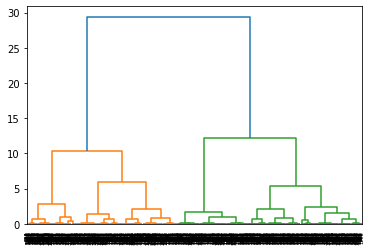

In [29]:
linkage_data = linkage(Newdf, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

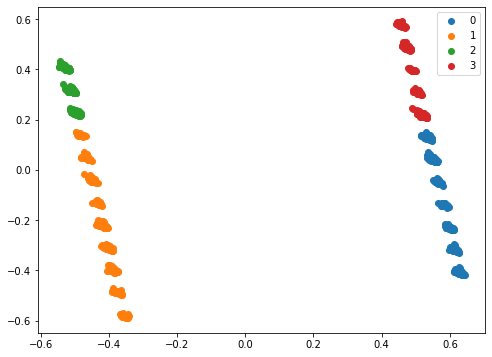

In [49]:
data = Newdf.values
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
label = labels.astype('int32')

fig, ax = plt.subplots(figsize=(8, 6))

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()